In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

    0.5/255  1/255  2/255  4/255   8/255
3     70.86  79.66  77.05  79.04   91.20
5     78.67  86.65  84.02  89.62   96.78
10    84.19  84.23  86.00  94.21   97.85
30    91.10  78.79  91.57  98.33  100.00
50    77.95  72.84  89.88  99.10  100.00


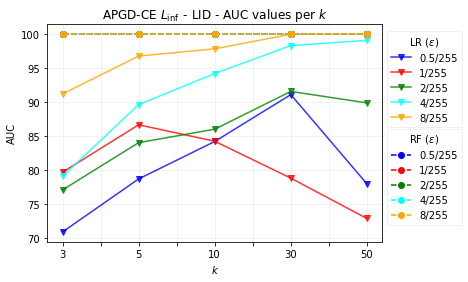

In [89]:
plt.figure(10)

# create data
df_bb = pd.DataFrame({
     '0.5/255': [  70.86,78.67,84.19,91.10,77.95   ], 
     '1/255' :  [  79.66,86.65,84.23,78.79,72.84   ], 
     '2/255' :  [  77.05,84.02,86.00,91.57,89.88   ],
     '4/255'  : [  79.04,89.62,94.21,98.33,99.10   ],
     '8/255'  : [  91.20,96.78,97.85,100.00,100.0  ],
      }, index=["3", "5", "10", "30", "50"]
    )

df_wb = pd.DataFrame({
     '0.5/255': [  100,100,100,100,100.0   ], 
     '1/255'  : [  100,100,100,100,100.0   ], 
     '2/255' :  [  100,100,100,100,100.0   ],
     '4/255'  : [  100,100,100,100,100.0   ],
     '8/255'  : [  100,100,100,100,100.0   ],
      }, index=["3", "5", "10", "30", "50"]
    )

color = [ 'blue', 'red','green','cyan','orange',]

# view data
print(df_bb)

ax = plt.gca()

# plot grouped bar chart
ax1 = df_bb.plot.line(
            ax=ax,
            # x='DataSet',
            xlabel="$k$",
            # rot=0,
            legend=False,
            color=color,
            alpha=0.8,
            marker='v',
            title="APGD-CE $L_{\inf}$ - LID - AUC values per $k$", 
            ylabel='AUC',
            # ylim=[0, 58.0]
        )

ax2 = df_wb.plot.line(
    ax=ax, 
    legend=False,
    marker='o', 
    linestyle='--', 
    color=color
    )

# legend = ax2.legend( title='WB',  loc='center right', framealpha=0.3)
legen2 = plt.legend(df_bb,  bbox_to_anchor=(1.0, 0.75), title='LR ($\epsilon$)', loc=6, framealpha=0.3)
plt.gca().add_artist(legen2)

h, l = ax2.get_legend_handles_labels()
legend = plt.legend(h[5:12], l[5:22],  bbox_to_anchor=(1.0, 0.3), title='RF ($\epsilon$)',  loc=6, framealpha=0.3)

# ax.set_xticks([32, 64 , 128])
ax.grid(which='major', alpha=0.2)

plt.savefig("plots/lines_over_k/line_apgd-ce_Linf.png", bbox_inches='tight')

      0.1    0.2    0.3    0.4    0.5
3   100.0  79.99  78.23  83.06  75.20
5   100.0  82.27  81.26  88.02  87.00
10  100.0  83.99  79.47  81.92  87.01
30  100.0  77.49  85.63  88.77  95.70
50  100.0  79.68  88.98  92.58  95.66


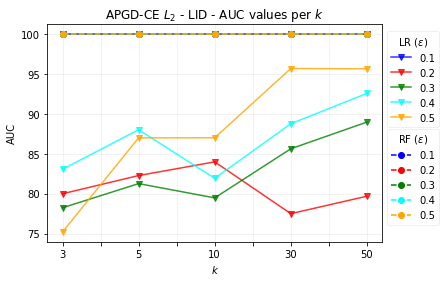

In [90]:
plt.figure(10)

# create data
df_bb = pd.DataFrame({
     '0.1'  : [ 100,100,100,100,100.0     ], 
     '0.2'  : [79.99,82.27,83.99,77.49,79.68 ], 
     '0.3'  : [78.23,81.26,79.47,85.63,88.98 ],
     '0.4'  : [83.06,88.02,81.92,88.77,92.58 ],
     '0.5'  : [75.20,87.00,87.01,95.70,95.66 ],
      }, index=["3", "5", "10", "30", "50"]
    )

df_wb = pd.DataFrame({
    '0.1':  [  100,100,100,100,100.0   ], 
    '0.2':  [  100,100,100,100,100.0   ], 
    '0.3':  [  100,100,100,100,100.0   ],
    '0.4' : [  100,100,100,100,100.0   ],
    '0.5' : [  100,100,100,100,100.0   ],
      }, index=["3", "5", "10", "30", "50"]
    )

color = [ 'blue', 'red','green','cyan','orange',]

# view data
print(df_bb)

ax = plt.gca()

# plot grouped bar chart
ax1 = df_bb.plot.line(
            ax=ax,
            # x='DataSet',
            xlabel="$k$",
            # rot=0,
            legend=False,
            color=color,
            alpha=0.8,
            marker='v',
            title="APGD-CE $L_2$ - LID - AUC values per $k$", 
            ylabel='AUC',
            # ylim=[0, 58.0]
        )

ax2 = df_wb.plot.line(
    ax=ax, 
    legend=False,
    marker='o', 
    linestyle='--', 
    color=color
    )

# legend = ax2.legend( title='WB',  loc='center right', framealpha=0.3)
legen2 = plt.legend(df_bb, bbox_to_anchor=(1.0, 0.75), title='LR ($\epsilon$)', loc=6, framealpha=0.3)
plt.gca().add_artist(legen2)

h, l = ax2.get_legend_handles_labels()
legend = plt.legend( h[5:22], l[5:22], bbox_to_anchor=(1.0, 0.3),  title='RF ($\epsilon$)',  loc=6, framealpha=0.3)

# ax.set_xticks([32, 64 , 128])
ax.grid(which='major', alpha=0.2)

plt.savefig("plots/lines_over_k/line_apgd-ce_L2.png", bbox_inches='tight')